In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2

In [2]:
input_path = 'C:\\Users\\sinad\\Dropbox (Gladstone)\\Feature_based_classification\\ten-crops-somas-vs-neurites'

In [3]:
img_list = os.listdir(input_path)

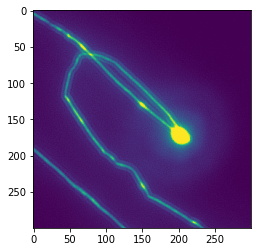

In [281]:
current_img_path = os.path.join(input_path, img_list[1])
current_img = cv2.imread(current_img_path, 0)
plt.imshow(current_img)

In [282]:
row, col = current_img.shape
print("the row and col are: ", row, col)

the row and col are:  300 300


In [283]:
centerRow, centerCol = int(row/2), int(col/2)
print("center row and col are: ", centerRow, centerCol)

center row and col are:  150 150


In [284]:
centerRectangle = 10

[[133.96536 146.54283 140.65453 ... 132.34305 140.65453 146.54283]
 [106.82669 145.22838 145.8522  ... 138.33304 141.69128 129.84607]
 [130.00716 148.75453 151.63934 ... 141.8854  130.99936 133.87488]
 ...
 [146.65092 152.69586 143.03894 ... 145.91992 144.78853 144.8734 ]
 [130.00714 133.87488 130.99936 ... 134.17567 151.63934 148.75453]
 [106.82667 129.84607 141.69128 ... 127.81333 145.8522  145.22838]]
143.54231


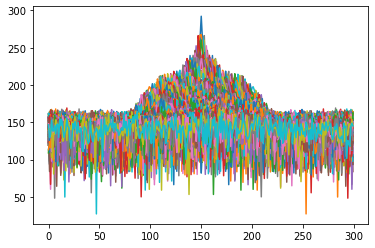

In [285]:
# imgAngle = np.angle(imgFFT2)
# print("img fft angle is: ", imgAngle)
dft = cv2.dft(np.float32(current_img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
imgMagnitude = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
print(imgMagnitude)
plt.plot(imgMagnitude)
print(np.median(imgMagnitude))

In [286]:
# Low pass filtering to get the soma
freqMask_LPF = np.zeros((row, col, 2), np.uint8)
freqMask_LPF[centerRow - centerRectangle: centerRow + centerRectangle,
            centerCol - centerRectangle: centerCol + centerRectangle] = 1
imgFFT_shift_LPF = dft_shift * freqMask_LPF
# print(imgFFT_shift_LPF)

20604.395


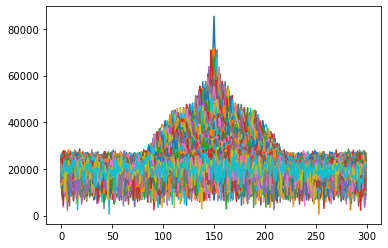

In [287]:
# power calculation
# imgFFT_shift_LPF_power = np.abs(imgFFT_shift_LPF)**2
# imgMagnitude_LPF = 20*np.log(cv2.magnitude(imgFFT_shift_LPF[:,:,0], imgFFT_shift_LPF[:,:,1]))
# plt.imshow(imgMagnitude_LPF)
power = imgMagnitude**2
median_pow = np.median(power)
print(median_pow)
plt.plot(power)

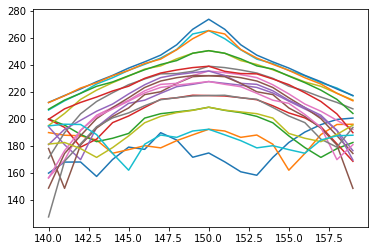

In [288]:
plt.plot(imgMagnitude_LPF)

In [289]:
# Median freq after LPF
med_LPF = np.median(imgFFT_shift_LPF[:,:,1])
print(med_LPF)

0.0


[[1819319.4 1963013.4 2096649.9 ... 1356755.  1513344.1 1668468.2]
 [1983565.5 2154414.8 2314737.2 ... 1440796.2 1623508.  1805499.1]
 [2134855.  2331906.8 2518087.2 ... 1515204.5 1722881.8 1930623. ]
 ...
 [1284246.4 1345863.9 1399546.9 ... 1067355.9 1143462.9 1216261.4]
 [1466045.1 1554612.6 1634425.  ... 1167922.6 1270718.4 1370743.9]
 [1645610.1 1761705.6 1868335.6 ... 1265096.1 1394883.4 1522517.9]]


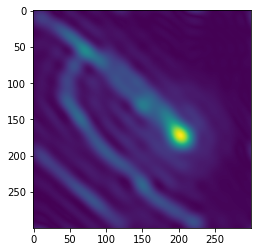

In [290]:
# Inverse Transfer to show the image
img_LPF_iFFT_shift = np.fft.ifftshift(imgFFT_shift_LPF)
img_back = cv2.idft(img_LPF_iFFT_shift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
# img_LPF_iFFT_mag = np.abs(img_LPF_iFFT)
print(img_back)
plt.imshow(img_back)

In [291]:
# high pass filtering
dft_shift[centerRow - centerRectangle: centerRow + centerRectangle,
            centerCol - centerRectangle: centerCol + centerRectangle] = 0

dft_i_shift = np.fft.ifftshift(dft_shift)
# print(dft_i_shift)
# plt.imshow(np.abs(FFT2shift))

[[ 796213.4  1101773.    968804.6  ... 1356754.8  1513344.   1578559.9 ]
 [1083476.8   913506.4   754206.4  ... 1440795.9  1623507.9  1805499.1 ]
 [4350078.5  1186929.    556535.94 ... 1515204.4  1722881.9  1750993.5 ]
 ...
 [1284246.9  1345863.9  1399546.9  ...  707426.8   513493.22  586266.1 ]
 [1286103.1  1554612.6  1454525.2  ...  268016.12  910762.    561092.9 ]
 [1375800.6  1581833.5  1688468.8  ...  905282.56  675558.06  893084.4 ]]


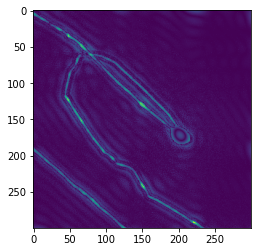

In [292]:
# Inverse Transfer to show the image
img_back = cv2.idft(dft_i_shift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
print(img_back)
plt.imshow(img_back)
#
# img_HPF_iFFT_shift = np.fft.ifftshift(imgFFT_shift_HPF)
# img_back = cv2.idft(img_HPF_iFFT_shift)
# img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
# img_LPF_iFFT_mag = np.abs(img_LPF_iFFT)
# print(img_back)
# plt.imshow(img_back)